In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
import tensorflow_datasets as tfds
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
tfds.list_builders()

In [ ]:
URL = "https://1drv.ms/u/s!AmgKYzARBl5ca3HNaHIlzp_IXjs"
from base64 import b64encode
base64Value = b64encode(URL.encode()).decode("UTF-8")
encodedUrl = "u!"+base64Value.replace('/','_').replace('+','-').strip("=")
DLURL = f"https://api.onedrive.com/v1.0/shares/{encodedUrl}/root/content"
!wget $DLURL -O NWPU-RESISC45.rar

--2022-11-10 21:51:14--  https://api.onedrive.com/v1.0/shares/u!aHR0cHM6Ly8xZHJ2Lm1zL3UvcyFBbWdLWXpBUkJsNWNhM0hOYUhJbHpwX0lYanM/root/content
Resolving api.onedrive.com (api.onedrive.com)... 13.107.42.12
Connecting to api.onedrive.com (api.onedrive.com)|13.107.42.12|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://sov8mq.dm.files.1drv.com/y4m4JOwqH0JXOhy8Y8QgSbFce3DlJKhuMVclXqqhqAPeUMnn1oEZ1O3seAcXqhzrrwFny_Oo3NuyLN_baLTq-eVEyhipspKOBrUrPIv3qr0DZTPvrq4SYCFInkim-_j4wa3IB6RKdSPPJ8Dhzyo8ZDRYD2xMpVVnJnhnqoEG8eG9fcBag1-dvcl9GkCF4XSlDnneyxiPNVH2uDcwCo0H_n2zA/NWPU-RESISC45.rar [following]
--2022-11-10 21:51:14--  https://sov8mq.dm.files.1drv.com/y4m4JOwqH0JXOhy8Y8QgSbFce3DlJKhuMVclXqqhqAPeUMnn1oEZ1O3seAcXqhzrrwFny_Oo3NuyLN_baLTq-eVEyhipspKOBrUrPIv3qr0DZTPvrq4SYCFInkim-_j4wa3IB6RKdSPPJ8Dhzyo8ZDRYD2xMpVVnJnhnqoEG8eG9fcBag1-dvcl9GkCF4XSlDnneyxiPNVH2uDcwCo0H_n2zA/NWPU-RESISC45.rar
Resolving sov8mq.dm.files.1drv.com (sov8mq.dm.files.1drv.com)... 13.107.42.12
Co

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!gdown --id 1y2MhN3fc-ce9m3EsBf6xj8UUFaXB36bU
!mkdir -p /content/drive/MyDrive/Colab\ Notebooks
!mv NWPU-RESISC45.rar /content/drive/MyDrive/Colab\ Notebooks

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1y2MhN3fc-ce9m3EsBf6xj8UUFaXB36bU
To: /content/NWPU-RESISC45.rar
100% 424M/424M [00:01<00:00, 287MB/s]


In [ ]:
!mkdir -p /root/tensorflow_datasets/downloads/manual
!cp /content/drive/MyDrive/Colab\ Notebooks/NWPU-RESISC45.rar .
!unrar x NWPU-RESISC45.rar /root/tensorflow_datasets/downloads/manual -idq -o+

In [ ]:
tfds.load("resisc45")

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/31500 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/resisc45/3.0.0.incompleteHVU96I/resisc45-train.tfrecord*...:   0%|          | …

Dataset resisc45 downloaded and prepared to ~/tensorflow_datasets/resisc45/3.0.0. Subsequent calls will reuse this data.


{Split('train'): <PrefetchDataset element_spec={'filename': TensorSpec(shape=(), dtype=tf.string, name=None), 'image': TensorSpec(shape=(256, 256, 3), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>}

# ---------------------------------------------------------------------------------------------------------------------------------


In [ ]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds

In [ ]:
import pathlib
data_dir = '/root/tensorflow_datasets/downloads/manual/NWPU-RESISC45/'
data_dir = pathlib.Path(data_dir)
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

31500


In [ ]:
batch_size = 32
img_height = 224
img_width = 224

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 31500 files belonging to 45 classes.
Using 25200 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 31500 files belonging to 45 classes.
Using 6300 files for validation.


In [ ]:
class_names = train_ds.class_names
class_names

['airplane',
 'airport',
 'baseball_diamond',
 'basketball_court',
 'beach',
 'bridge',
 'chaparral',
 'church',
 'circular_farmland',
 'cloud',
 'commercial_area',
 'dense_residential',
 'desert',
 'forest',
 'freeway',
 'golf_course',
 'ground_track_field',
 'harbor',
 'industrial_area',
 'intersection',
 'island',
 'lake',
 'meadow',
 'medium_residential',
 'mobile_home_park',
 'mountain',
 'overpass',
 'palace',
 'parking_lot',
 'railway',
 'railway_station',
 'rectangular_farmland',
 'river',
 'roundabout',
 'runway',
 'sea_ice',
 'ship',
 'snowberg',
 'sparse_residential',
 'stadium',
 'storage_tank',
 'tennis_court',
 'terrace',
 'thermal_power_station',
 'wetland']

In [ ]:
normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1/255)

In [ ]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))
train_ds

0.0 0.96214443


<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE
#train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
#val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


In [ ]:
num_classes = 45

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

## INITIAL RUN

In [ ]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [ ]:
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=10
)

Epoch 1/10
1575/1575 [==============================] - 68s 37ms/step - loss: 2.7640 - accuracy: 0.2385 - val_loss: 2.1144 - val_accuracy: 0.3832
Epoch 2/10
1575/1575 [==============================] - 57s 36ms/step - loss: 1.7371 - accuracy: 0.4947 - val_loss: 1.9564 - val_accuracy: 0.4590
Epoch 3/10
1575/1575 [==============================] - 60s 38ms/step - loss: 1.0655 - accuracy: 0.6839 - val_loss: 2.2523 - val_accuracy: 0.4627
Epoch 4/10
1575/1575 [==============================] - 58s 37ms/step - loss: 0.5826 - accuracy: 0.8237 - val_loss: 3.0341 - val_accuracy: 0.4444
Epoch 5/10
1575/1575 [==============================] - 59s 37ms/step - loss: 0.3313 - accuracy: 0.9002 - val_loss: 3.7305 - val_accuracy: 0.4224
Epoch 6/10
1575/1575 [==============================] - 59s 38ms/step - loss: 0.2407 - accuracy: 0.9284 - val_loss: 4.4716 - val_accuracy: 0.4171
Epoch 7/10
1575/1575 [==============================] - 58s 36ms/step - loss: 0.1923 - accuracy: 0.9442 - val_loss: 4.7234 -

## RUN 2: LESS NEURONS, SO LESS OVERFITTING 

In [ ]:
model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(16, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(16, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(8, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [ ]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [ ]:
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=10
)

Epoch 1/10
1575/1575 [==============================] - 44s 28ms/step - loss: 2.8497 - accuracy: 0.2151 - val_loss: 2.4064 - val_accuracy: 0.2967
Epoch 2/10
1575/1575 [==============================] - 42s 27ms/step - loss: 2.1667 - accuracy: 0.3773 - val_loss: 2.3331 - val_accuracy: 0.3405
Epoch 3/10
1575/1575 [==============================] - 41s 26ms/step - loss: 1.7167 - accuracy: 0.4991 - val_loss: 2.3017 - val_accuracy: 0.3759
Epoch 4/10
1575/1575 [==============================] - 42s 27ms/step - loss: 1.3209 - accuracy: 0.6118 - val_loss: 2.6441 - val_accuracy: 0.3749
Epoch 5/10
1575/1575 [==============================] - 41s 26ms/step - loss: 0.9442 - accuracy: 0.7178 - val_loss: 3.3604 - val_accuracy: 0.3392
Epoch 6/10
1575/1575 [==============================] - 40s 26ms/step - loss: 0.6490 - accuracy: 0.8032 - val_loss: 4.0323 - val_accuracy: 0.3435
Epoch 7/10
1575/1575 [==============================] - 41s 26ms/step - loss: 0.4607 - accuracy: 0.8615 - val_loss: 4.6828 -

## RUN 3: MORE NEURONS, SINCE WITH LESS THERE IS LESS ACCURACY

In [ ]:
model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(64, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [ ]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [ ]:
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=10
)

Epoch 1/10
1575/1575 [==============================] - 87s 55ms/step - loss: 3.8085 - accuracy: 0.0203 - val_loss: 3.8080 - val_accuracy: 0.0211
Epoch 2/10
1575/1575 [==============================] - 86s 54ms/step - loss: 3.8074 - accuracy: 0.0209 - val_loss: 3.7945 - val_accuracy: 0.0183
Epoch 3/10
1575/1575 [==============================] - 86s 55ms/step - loss: 3.8074 - accuracy: 0.0213 - val_loss: 3.8083 - val_accuracy: 0.0211
Epoch 4/10
1575/1575 [==============================] - 87s 55ms/step - loss: 3.8081 - accuracy: 0.0210 - val_loss: 3.8090 - val_accuracy: 0.0211
Epoch 5/10
1575/1575 [==============================] - 86s 55ms/step - loss: 3.8075 - accuracy: 0.0199 - val_loss: 3.8082 - val_accuracy: 0.0197
Epoch 6/10
1575/1575 [==============================] - 87s 55ms/step - loss: 3.8073 - accuracy: 0.0210 - val_loss: 3.8082 - val_accuracy: 0.0197
Epoch 7/10
1575/1575 [==============================] - 86s 55ms/step - loss: 3.8073 - accuracy: 0.0206 - val_loss: 3.8082 -

## RUN 4: KEEP THE LARGE ARCHITECTURE AND REDUCE THE LEARNING RATE THROUGH THE OPTIMIZER.

In [ ]:
batch_size = 32
model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(16, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(16, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(8, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [ ]:
from tensorflow import keras
opt = keras.optimizers.Adam(learning_rate=0.005)
model.compile(
  optimizer=opt,
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [ ]:
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=10
)

Epoch 1/10
1575/1575 [==============================] - 85s 54ms/step - loss: 3.8095 - accuracy: 0.0212 - val_loss: 3.8105 - val_accuracy: 0.0211
Epoch 2/10
1575/1575 [==============================] - 84s 54ms/step - loss: 3.8096 - accuracy: 0.0215 - val_loss: 3.8108 - val_accuracy: 0.0211
Epoch 3/10
1575/1575 [==============================] - 85s 54ms/step - loss: 3.8095 - accuracy: 0.0219 - val_loss: 3.8107 - val_accuracy: 0.0211
Epoch 4/10
1575/1575 [==============================] - 84s 53ms/step - loss: 3.8096 - accuracy: 0.0215 - val_loss: 3.8107 - val_accuracy: 0.0211
Epoch 5/10
1575/1575 [==============================] - 85s 54ms/step - loss: 3.8095 - accuracy: 0.0218 - val_loss: 3.8107 - val_accuracy: 0.0211
Epoch 6/10
1575/1575 [==============================] - 84s 53ms/step - loss: 3.8096 - accuracy: 0.0221 - val_loss: 3.8108 - val_accuracy: 0.0211
Epoch 7/10
1575/1575 [==============================] - 84s 53ms/step - loss: 3.8095 - accuracy: 0.0217 - val_loss: 3.8106 -

## RUN 5: LEARNING RATE IS INCREASED, IT PROBABLY FELL INTO LOCAL MINIMA, INSTEAD OF GLOBAL MINIMA

In [ ]:
model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(16, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(16, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(8, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [ ]:
from tensorflow import keras
opt = keras.optimizers.Adam(learning_rate=0.1)
model.compile(
  optimizer=opt,
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [ ]:
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=10
)

Epoch 1/10
1575/1575 [==============================] - 40s 25ms/step - loss: 5.5920 - accuracy: 0.0218 - val_loss: 3.9575 - val_accuracy: 0.0243
Epoch 2/10
1575/1575 [==============================] - 40s 25ms/step - loss: 3.8491 - accuracy: 0.0224 - val_loss: 3.9535 - val_accuracy: 0.0224
Epoch 3/10
1575/1575 [==============================] - 40s 25ms/step - loss: 3.8463 - accuracy: 0.0225 - val_loss: 3.9418 - val_accuracy: 0.0224
Epoch 4/10
1575/1575 [==============================] - 39s 25ms/step - loss: 3.8467 - accuracy: 0.0224 - val_loss: 3.9542 - val_accuracy: 0.0224
Epoch 5/10
1575/1575 [==============================] - 41s 26ms/step - loss: 3.8470 - accuracy: 0.0219 - val_loss: 3.9491 - val_accuracy: 0.0224
Epoch 6/10
1575/1575 [==============================] - 40s 25ms/step - loss: 3.8473 - accuracy: 0.0222 - val_loss: 3.9545 - val_accuracy: 0.0224
Epoch 7/10
1575/1575 [==============================] - 40s 25ms/step - loss: 3.8466 - accuracy: 0.0227 - val_loss: 3.9512 -

## RUN 6. USE L1 AND L2 REGULARIZATION. THE LEARNING RATE WILL BE KEPT LIKE THE INITIAL RUN. THE ARCHITECTURE SIZE WILL STILL BE THE INITIAL ONE

In [ ]:
from tensorflow.keras.regularizers import l1_l2

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu',kernel_regularizer = l1_l2(l1 = 0.0, l2 = 0.0001)),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu',kernel_regularizer = l1_l2(l1 = 0.0, l2 = 0.0001)),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu',kernel_regularizer = l1_l2(l1 = 0.0, l2 = 0.0001)),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [ ]:
from tensorflow import keras
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

## RUN 7: CHANGE OF ACTIVATION FUNCTIONS / SIGMOID IS THE FIRST TO BE TRIED.

In [ ]:
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=10
)

Epoch 1/10
1575/1575 [==============================] - 57s 36ms/step - loss: 2.6673 - accuracy: 0.2573 - val_loss: 2.1852 - val_accuracy: 0.3724
Epoch 2/10
1575/1575 [==============================] - 55s 35ms/step - loss: 1.8319 - accuracy: 0.4720 - val_loss: 2.0227 - val_accuracy: 0.4406
Epoch 3/10
1575/1575 [==============================] - 56s 35ms/step - loss: 1.1867 - accuracy: 0.6575 - val_loss: 2.3461 - val_accuracy: 0.4260
Epoch 4/10
1575/1575 [==============================] - 56s 36ms/step - loss: 0.6894 - accuracy: 0.7984 - val_loss: 3.1873 - val_accuracy: 0.4105
Epoch 5/10
1575/1575 [==============================] - 56s 36ms/step - loss: 0.4141 - accuracy: 0.8814 - val_loss: 4.0214 - val_accuracy: 0.3817
Epoch 6/10
1575/1575 [==============================] - 55s 35ms/step - loss: 0.2894 - accuracy: 0.9190 - val_loss: 4.6364 - val_accuracy: 0.3967
Epoch 7/10
1575/1575 [==============================] - 55s 35ms/step - loss: 0.2255 - accuracy: 0.9382 - val_loss: 5.0545 -

In [ ]:
from tensorflow.keras.regularizers import l1_l2

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu',kernel_regularizer = l1_l2(l1 = 0.00000001, l2 = 0.0001)),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu',kernel_regularizer = l1_l2(l1 = 0.00000001, l2 = 0.0001)),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='sigmoid',kernel_regularizer = l1_l2(l1 = 0.00001, l2 = 0.0001)),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='sigmoid'),
  tf.keras.layers.Dense(num_classes)
])

In [ ]:
from tensorflow import keras
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [ ]:
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=10
)

Epoch 1/10
1575/1575 [==============================] - 58s 36ms/step - loss: 3.8347 - accuracy: 0.0219 - val_loss: 3.8350 - val_accuracy: 0.0224
Epoch 2/10
1575/1575 [==============================] - 56s 35ms/step - loss: 3.8272 - accuracy: 0.0219 - val_loss: 3.8322 - val_accuracy: 0.0224
Epoch 3/10
1575/1575 [==============================] - 56s 35ms/step - loss: 3.8271 - accuracy: 0.0227 - val_loss: 3.8321 - val_accuracy: 0.0224
Epoch 4/10
1575/1575 [==============================] - 57s 36ms/step - loss: 3.8271 - accuracy: 0.0223 - val_loss: 3.8322 - val_accuracy: 0.0224
Epoch 5/10
1575/1575 [==============================] - 56s 36ms/step - loss: 3.8272 - accuracy: 0.0237 - val_loss: 3.8313 - val_accuracy: 0.0243
Epoch 6/10
1575/1575 [==============================] - 56s 35ms/step - loss: 3.8275 - accuracy: 0.0217 - val_loss: 3.8330 - val_accuracy: 0.0224
Epoch 7/10
1575/1575 [==============================] - 55s 35ms/step - loss: 3.8267 - accuracy: 0.0219 - val_loss: 3.8368 -

## NOT A GREAT RESULT, ADDING SOFTMAX AT THE END
---



In [ ]:
from tensorflow.keras.regularizers import l1_l2

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='softmax'),
  tf.keras.layers.Dense(num_classes)
])

In [ ]:
from tensorflow import keras
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [ ]:
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=10
)

Epoch 1/10
1575/1575 [==============================] - 56s 35ms/step - loss: 3.7117 - accuracy: 0.0658 - val_loss: 3.8149 - val_accuracy: 0.0341
Epoch 2/10
1575/1575 [==============================] - 55s 35ms/step - loss: 3.6002 - accuracy: 0.0781 - val_loss: 3.5461 - val_accuracy: 0.0825
Epoch 3/10
1575/1575 [==============================] - 55s 35ms/step - loss: 3.4701 - accuracy: 0.0896 - val_loss: 3.4374 - val_accuracy: 0.0876
Epoch 4/10
1575/1575 [==============================] - 55s 35ms/step - loss: 3.6065 - accuracy: 0.0684 - val_loss: 3.4251 - val_accuracy: 0.0825
Epoch 5/10
1575/1575 [==============================] - 56s 35ms/step - loss: 3.4605 - accuracy: 0.0855 - val_loss: 3.4166 - val_accuracy: 0.0894
Epoch 6/10
1575/1575 [==============================] - 56s 36ms/step - loss: 3.3877 - accuracy: 0.0959 - val_loss: 3.4261 - val_accuracy: 0.0857
Epoch 7/10
1575/1575 [==============================] - 55s 35ms/step - loss: 3.3800 - accuracy: 0.0977 - val_loss: 3.3435 -

## HYPERPARAMETER TRAINING COMPLETE. MOVING ONTO ENSEMBLE

In [ ]:
import seaborn as sns 
sns.set(font_scale=1.5)
import pandas as pd
import os 
import keras
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import model_from_json
from keras.models import Sequential
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout,BatchNormalization
from keras.callbacks import LearningRateScheduler
from scipy.ndimage.filters import gaussian_filter
from scipy.ndimage.interpolation import map_coordinates
import matplotlib.pyplot as plt
import os




nets = 3
model_ensemble = [0] * nets
for j in range(nets):
  model_ensemble[j] = Sequential()
  model_ensemble[j].add(Conv2D(32, kernel_size = 3, activation = 'relu', input_shape = (256,256,3)))
  model_ensemble[j].add(BatchNormalization())
  model_ensemble[j].add(Conv2D(32, kernel_size = 3, activation = 'relu'))
  model_ensemble[j].add(BatchNormalization())
  model_ensemble[j].add(Conv2D(32, kernel_size = 3, activation = 'relu'))
  model_ensemble[j].add(BatchNormalization())
  model_ensemble[j].add(Flatten())
  model_ensemble[j].add(Dense(128,  activation = 'relu'))
  model_ensemble[j].add(Dense(num_classes))
  model_ensemble[j].compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

model_ensemble[0].summary()




Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_4 (Conv2D)           (None, 252, 252, 32)      9248      
                                                                 
 batch_normalization_1 (Batc  (None, 252, 252, 32)     128       
 hNormalization)                                                 
                                                                 
 conv2d_5 (Conv2D)           (None, 250, 250, 32)      9248      
                                                                 
 batch_normalization_2 (Batc  (None, 250, 250, 32)    

In [ ]:
history = [0] * nets
history[0] = model_ensemble[0].fit(train_ds, validation_data=val_ds, epochs=10)
model_ensemble[0].save_weights("modelw"+str(j)+".h5")

history[1] = model_ensemble[1].fit(train_ds, validation_data=val_ds, epochs=10)
model_ensemble[1].save_weights("modelw"+str(j)+".h5")

history[2] = model_ensemble[2].fit(train_ds, validation_data=val_ds, epochs=10)
model_ensemble[2].save_weights("modelw"+str(j)+".h5")

Epoch 1/10
788/788 [==============================] - 210s 254ms/step - loss: 18.4652 - accuracy: 0.0413 - val_loss: 4.5603 - val_accuracy: 0.0332
Epoch 2/10
788/788 [==============================] - 196s 248ms/step - loss: 3.9233 - accuracy: 0.0631 - val_loss: 4.1342 - val_accuracy: 0.0249
Epoch 3/10
788/788 [==============================] - 195s 247ms/step - loss: 4.0131 - accuracy: 0.0518 - val_loss: 4.5135 - val_accuracy: 0.0263
Epoch 4/10
788/788 [==============================] - 195s 247ms/step - loss: 3.9416 - accuracy: 0.0423 - val_loss: 3.9094 - val_accuracy: 0.0303
Epoch 5/10
788/788 [==============================] - 194s 245ms/step - loss: 3.9581 - accuracy: 0.0379 - val_loss: 3.8148 - val_accuracy: 0.0197
Epoch 6/10
788/788 [==============================] - 193s 245ms/step - loss: 3.9098 - accuracy: 0.0271 - val_loss: 3.8447 - val_accuracy: 0.0197
Epoch 7/10
788/788 [==============================] - 193s 245ms/step - loss: 3.8715 - accuracy: 0.0276 - val_loss: 4.7058 

## TRANSFER LEARNING


In [ ]:
from tensorflow.keras.applications import EfficientNetB0

In [ ]:
effnet = EfficientNetB0(weights='imagenet',include_top=False,input_shape=(256,256,3))

In [ ]:
model = effnet.output
model = tf.keras.layers.GlobalAveragePooling2D()(model)
model = tf.keras.layers.Dropout(rate=0.5)(model)
model = tf.keras.layers.Dense(4,activation='relu')(model)
model = tf.keras.models.Model(inputs=effnet.input, outputs = model)

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',optimizer = 'Adam', metrics= ['accuracy'])

In [ ]:
tensorboard = TensorBoard(log_dir = 'logs')
checkpoint = ModelCheckpoint("effnet.h5",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, patience = 2, min_delta = 0.001,
                              mode='auto',verbose=1)

In [ ]:
history = model.fit(train_ds, validation_data=val_ds, epochs=10, batch_size=64,
                   callbacks=[tensorboard,checkpoint,reduce_lr])

Epoch 1/10
788/788 [==============================] - ETA: 0s - loss: nan - accuracy: 0.0229
Epoch 1: val_accuracy improved from -inf to 0.01968, saving model to effnet.h5
788/788 [==============================] - 350s 404ms/step - loss: nan - accuracy: 0.0229 - val_loss: nan - val_accuracy: 0.0197 - lr: 0.0010
Epoch 2/10
788/788 [==============================] - ETA: 0s - loss: nan - accuracy: 0.0229
Epoch 2: val_accuracy did not improve from 0.01968
788/788 [==============================] - 314s 399ms/step - loss: nan - accuracy: 0.0229 - val_loss: nan - val_accuracy: 0.0197 - lr: 0.0010
Epoch 3/10
788/788 [==============================] - ETA: 0s - loss: nan - accuracy: 0.0229
Epoch 3: val_accuracy did not improve from 0.01968

Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
788/788 [==============================] - 317s 402ms/step - loss: nan - accuracy: 0.0229 - val_loss: nan - val_accuracy: 0.0197 - lr: 0.0010
Epoch 4/10
788/788 [=================

In [ ]:
from tensorflow.keras.applications import vgg16
from tensorflow.keras.models import Sequential

In [ ]:
vgg_model = vgg16.VGG16()

In [ ]:
model = Sequential()
for layer in vgg_model.layers[0:-1]:
  model.add(layer)
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

In [ ]:
for layer in model.layers:
  layer.trainable = False
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

In [ ]:
from tensorflow.keras.layers import Dense

In [ ]:
model.add(Dense(45))

In [ ]:
model.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), metrics = ['accuracy'])


In [ ]:
H = model.fit(train_ds, validation_data = val_ds, epochs = 10)

Epoch 1/10
788/788 [==============================] - 173s 206ms/step - loss: 1.1669 - accuracy: 0.6949 - val_loss: 0.9721 - val_accuracy: 0.7462
Epoch 2/10
788/788 [==============================] - 160s 203ms/step - loss: 0.6256 - accuracy: 0.8182 - val_loss: 1.0673 - val_accuracy: 0.7497
Epoch 3/10
788/788 [==============================] - 160s 202ms/step - loss: 0.4304 - accuracy: 0.8680 - val_loss: 1.0267 - val_accuracy: 0.7546
Epoch 4/10
788/788 [==============================] - 160s 202ms/step - loss: 0.3043 - accuracy: 0.9025 - val_loss: 0.9762 - val_accuracy: 0.7751
Epoch 5/10
788/788 [==============================] - 159s 202ms/step - loss: 0.2390 - accuracy: 0.9202 - val_loss: 1.0300 - val_accuracy: 0.7724
Epoch 6/10
788/788 [==============================] - 160s 203ms/step - loss: 0.1927 - accuracy: 0.9350 - val_loss: 1.1200 - val_accuracy: 0.7727
Epoch 7/10
788/788 [==============================] - 160s 203ms/step - loss: 0.1834 - accuracy: 0.9381 - val_loss: 1.1827 -

## TRAIN - VAL - TEST SPLIT

In [ ]:
!pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import splitfolders


splitfolders.ratio(
    data_dir,  # The location of dataset
    output="split",  # The output location
    seed= 123, 
    ratio=(0.8, 0.1, 0.1),  # The ratio of the split dataset
    group_prefix=None,
    move=False,
)

Copying files: 31500 files [00:07, 4197.93 files/s]


In [ ]:
trainX = tf.keras.utils.image_dataset_from_directory('/content/split/train/', image_size=(256,256), labels='inferred')

Found 25200 files belonging to 45 classes.


In [ ]:
testX = tf.keras.utils.image_dataset_from_directory('/content/split/test/', image_size=(256,256), labels='inferred')

Found 3150 files belonging to 45 classes.


In [ ]:
valX = tf.keras.utils.image_dataset_from_directory('/content/split/val/', image_size=(256,256), labels='inferred')

Found 3150 files belonging to 45 classes.


In [ ]:
num_classes = 45

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [ ]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [ ]:
model.fit(
    trainX,
    validation_data = valX,
    epochs = 10,
)

Epoch 1/10
788/788 [==============================] - 58s 72ms/step - loss: 2.8795 - accuracy: 0.2170 - val_loss: 2.0812 - val_accuracy: 0.3962
Epoch 2/10
788/788 [==============================] - 52s 65ms/step - loss: 1.7038 - accuracy: 0.5062 - val_loss: 1.8775 - val_accuracy: 0.4683
Epoch 3/10
788/788 [==============================] - 52s 65ms/step - loss: 0.9736 - accuracy: 0.7174 - val_loss: 2.1932 - val_accuracy: 0.4708
Epoch 4/10
788/788 [==============================] - 52s 65ms/step - loss: 0.4446 - accuracy: 0.8690 - val_loss: 2.8347 - val_accuracy: 0.4635
Epoch 5/10
788/788 [==============================] - 52s 66ms/step - loss: 0.2360 - accuracy: 0.9316 - val_loss: 3.4896 - val_accuracy: 0.4413
Epoch 6/10
788/788 [==============================] - 52s 66ms/step - loss: 0.1650 - accuracy: 0.9522 - val_loss: 4.2173 - val_accuracy: 0.4140
Epoch 7/10
788/788 [==============================] - 52s 65ms/step - loss: 0.1169 - accuracy: 0.9652 - val_loss: 4.3794 - val_accuracy:

In [ ]:
testY = np.concatenate([y
   for x, y in testX
], axis = 0)

In [ ]:
classes  = testX.class_names

In [ ]:
classes[12]

'desert'

99/99 [==============================] - 4s 37ms/step

Testing Classification Report:

               precision    recall  f1-score   support

           0       0.03      0.03      0.03        70
           1       0.02      0.01      0.02        70
           2       0.00      0.00      0.00        70
           3       0.01      0.01      0.01        70
           4       0.00      0.00      0.00        70
           5       0.03      0.03      0.03        70
           6       0.03      0.03      0.03        70
           7       0.00      0.00      0.00        70
           8       0.00      0.00      0.00        70
           9       0.03      0.03      0.03        70
          10       0.02      0.03      0.02        70
          11       0.03      0.09      0.05        70
          12       0.00      0.00      0.00        70
          13       0.03      0.04      0.04        70
          14       0.02      0.01      0.02        70
          15       0.05      0.03      0.04    

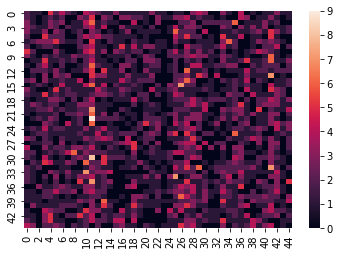

<Figure size 432x288 with 0 Axes>

In [ ]:
from seaborn import heatmap
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

# predict the labels of the test set
predictedY = model.predict(testX).argmax(axis=1)
heatmap(confusion_matrix(testY, predictedY))
plt.figure()

# print quality metricsl
print('\nTesting Classification Report:\n\n', classification_report(testY, predictedY))

# predict the labels of the test set
predictedY = model.predict(testX)

print('\nTesting Confusion Matrix:\n')



## REPORT
  Out of all the assignments the class has completed so far, this was the hardest one, although I am glad to have completed it. The dataset was incredibly large, and tensorflow's methods of unpacking and storing it were quite tedious, and I soend most of the time trying to understand them. By the time I was done with this assignment, I knew both what a PreFetch and Batch Dataset were; I like the standard pd.DatFrame better. 

### Hyperparameter Tuning 
  A plethora of models have been run; 11, to be exact. The first 8 focused oon hyperparameter tuning. The hyperparameters that were tuned were _learning rate_, _activation function_, _regularisation_ and _architecture size_. The initial model implemented 2 hidden *relu* layers, with 32 neurons, and an output *relu* with 128 neurons. The basic model, sadly, reached the highest accuracy, with a high of 46.27%. Decreasing the learning rate to 0.0005 made the model consistently fall into local minimas, and increasing it made the model jump over the global minimas. Other activation functions and combinations of activation functions were not successfull (even when paired with different loss functions, including MAE and binary cross entropy, just to be sure), and the regularisations decreased the overall performance (all dancing around the 2% line). Increasing the architecture raises the accuracy initially, however then develops into overfitting. Decreasing the architecture size, on the other hand, does not allow the accuracy to rise at all. It seems the initial model was sitting on a sweetspot.

  ### Transfer and Ensemble
  I regard both transfer and ensemble models to be extremely valuable. If implemented correctly, they can elevate a model tenfold. I used EfficientB0 with the _imagenet_  weights for my Transfer. Previously, I had tried AlexNet and EfficientB1, but they were giving me problems and, most of all, an infinite loss. While my transfer didn't perform well at all, it was incredibly interesting watching the learning rate adjust itself as the accuracy was unchanging. Thanks to the transfer learning, I realised that the learning rate was not the problem. Afterwards, I tried VGG16 as an alternative, and outperformed every single model, with an unprecented accuracy of 78%. To date, VGG16 is the best, and I am glad I used it. 

  For my ensembling method, I wanted to push the basic model to its limit, by stacking it three times and saving the weights. It did not work, as the model fell into a local minima, and stayed there for quite some time. The model takes a little less than 2 hours to run, and I ran it two times, the first one with Dropout, and the second one without it. I was really hoping for the ensemble to go well, I'm said it didn't. 

 ### Test split
  Splitting a prefetch dataset was not an easy task, but luckily it was accomplished. The basic, mist successfull model was run on the new splits, and proved to have the highest intermediate accuracy: 47%. It also took about a minute per epoch, so amazing time management as well. Subsequently, the heatmap and confusion map show that the classification report isn't accurate with its findings. The heatmap is simply too complex to draw anything at first glance, although once profusel observed, one can see that the accuracy for each class is around 40-50%. For some reason, class 12 and class 21 get confused quite often. This is because class 12 is 'Desert', while class 21 is 'Lake'. Two flat surfaces, with homogeneous coloring, it is understandable. 

